<a href="https://colab.research.google.com/github/Andrey22154/test_task_m.video/blob/main/m_video_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_excel('/content/m.video.xlsx')

In [17]:
data.head()

,Unnamed: 0
0,"5,39,""Ж"""
1,"4,54,""М"""
2,"4,26,""М"""
3,"5,42,""М"""
4,"4,29,""М"""


Нужно привести данные к виду, с которым можно работать

In [5]:
data['days_count'] = data['Unnamed: 0'].str.split(',').str.get(0)
data['Age'] = data['Unnamed: 0'].str.split(',').str.get(1)
data['Sex'] = data['Unnamed: 0'].str.split(',').str.get(2)
data['Sex'] = data['Sex'].replace({'"М"':'M', 
                                   '"Ж"':'F'})
data = data.drop(['Unnamed: 0'], axis = 1)

In [19]:
data.head()

,days_count,Age,Sex
0,5,39,"""Ж"""
1,4,54,"""М"""
2,4,26,"""М"""
3,5,42,"""М"""
4,4,29,"""М"""


In [6]:
data.days_count = data.days_count.apply(np.int64)
data.days_count = data.days_count.apply(np.int64)

In [7]:
data.Age = data.Age.apply(np.int64)
data.Age = data.Age.apply(np.int64)

In [35]:
data_sex_m = data[data.Sex == "M"]
data_sex_f = data[data.Sex == 'F']

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   days_count  237 non-null    object
 1   Age         237 non-null    object
 2   Sex         237 non-null    object
dtypes: object(3)
memory usage: 5.7+ KB


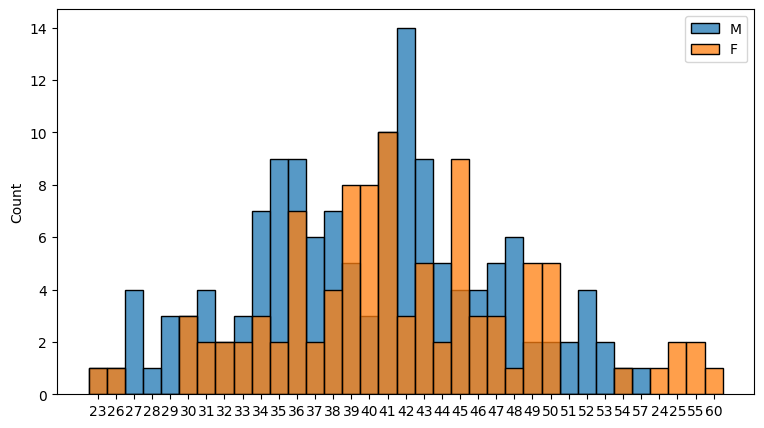

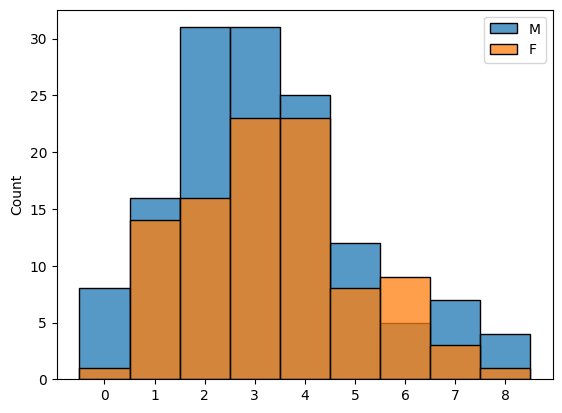

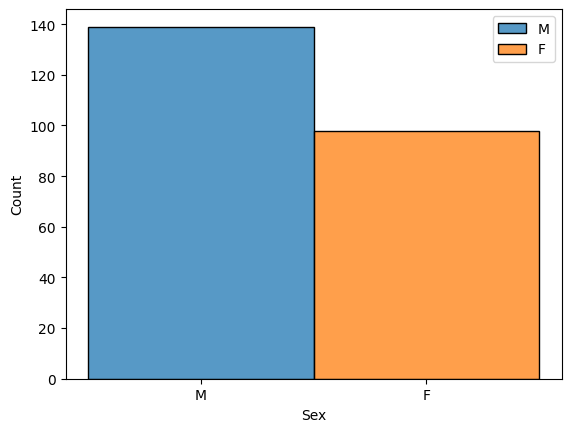

In [50]:
plt.figure(figsize = (9, 5))
sns.histplot(sorted(data_sex_m.Age), label = 'M')
sns.histplot(sorted(data_sex_f.Age), label = 'F')
plt.legend()
plt.show()
sns.histplot(sorted(data_sex_m.days_count), label = 'M')
sns.histplot(sorted(data_sex_f.days_count), label = 'F')
plt.legend()
plt.show()
sns.histplot(data_sex_m.Sex, label = 'M')
sns.histplot(data_sex_f.Sex, label = 'F')
plt.legend()
plt.show()

Из графиков можно сделать несколько выводов:

1) Мужчин больше, чем женщин

2) Мужчины чаще берут больничный

Теперь проверим количество больничных дней больше двух 

In [70]:
data_sex_m = data_sex_m[data_sex_m.days_count > 2]
data_sex_f = data_sex_f[data_sex_f.days_count > 2]

In [89]:
data_sex_m.groupby('days_count').agg({'Age':'count'})

,Age
days_count,
3,31
4,25
5,12
6,5
7,7
8,4


In [90]:
data_sex_f.groupby('days_count').agg({'Age':'count'})

,Age
days_count,
3,23
4,23
5,8
6,9
7,3
8,1


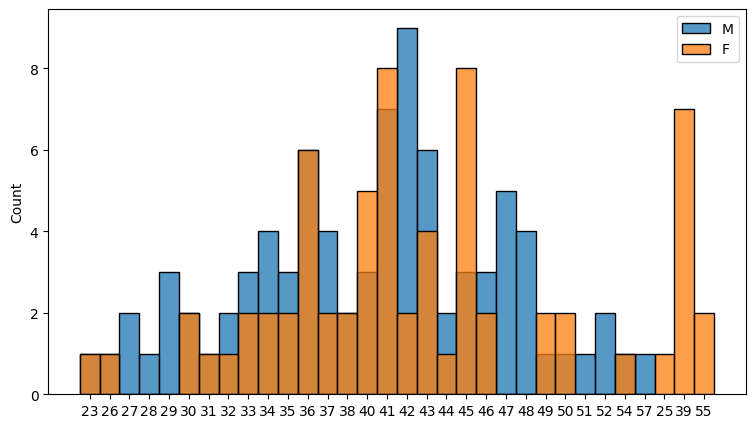

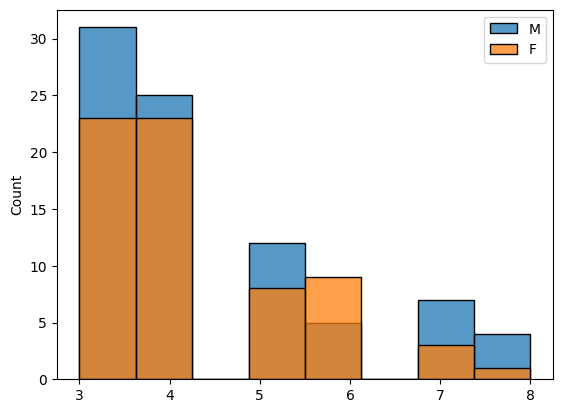

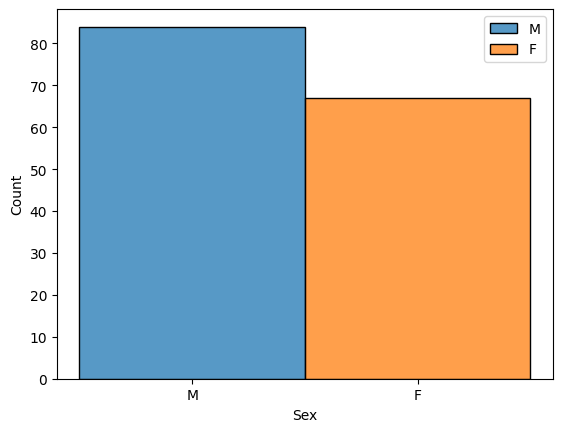

In [71]:
plt.figure(figsize = (9, 5))
sns.histplot(sorted(data_sex_m.Age), label = 'M')
sns.histplot(sorted(data_sex_f.Age), label = 'F')
plt.legend()
plt.show()
sns.histplot(sorted(data_sex_m.days_count), label = 'M')
sns.histplot(sorted(data_sex_f.days_count), label = 'F')
plt.legend()
plt.show()
sns.histplot(data_sex_m.Sex, label = 'M')
sns.histplot(data_sex_f.Sex, label = 'F')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (9, 5))
sns.histplot(sorted(data_sex_m.Age), label = 'M')
sns.histplot(sorted(data_sex_f.Age), label = 'F')
plt.legend()
plt.show()
sns.histplot(sorted(data_sex_m.days_count), label = 'M')
sns.histplot(sorted(data_sex_f.days_count), label = 'F')
plt.legend()
plt.show()
sns.histplot(data_sex_m.Sex, label = 'M')
sns.histplot(data_sex_f.Sex, label = 'F')
plt.legend()
plt.show()

**Проверка первой гипотезы**

Для проверки гипотезы используем стандарный t-test

In [72]:
from scipy import stats

In [73]:
stats.ttest_ind(data_sex_m.days_count, data_sex_f.days_count)

Ttest_indResult(statistic=0.41592499748510986, pvalue=0.67806332103283)

При сравнении двух групп (мужчин и женщин) по количеству больничных дней не обнаружены статистически значимые отличия (p_value > 0.05)

То есть, H0 - между группами нет статистически значимых отличий

H1 - между группами есть статистически значимые отличия 

Поскольку у нас p_value > 0.05 (= 0.67), то мы не можем отклонить нулевую гипотезу

In [91]:
data = data[data.days_count > 2]

**Вторая гипотеза**

In [92]:
data_less_35 = data[data.Age > 35]
data_more_35 = data[data.Age <= 35]

In [93]:
data_less_35.groupby('days_count').agg({'Age':'count'})

,Age
days_count,
3,44
4,34
5,15
6,12
7,7
8,3


In [94]:
data_more_35.groupby('days_count').agg({'Age':'count'})

,Age
days_count,
3,10
4,14
5,5
6,2
7,3
8,2


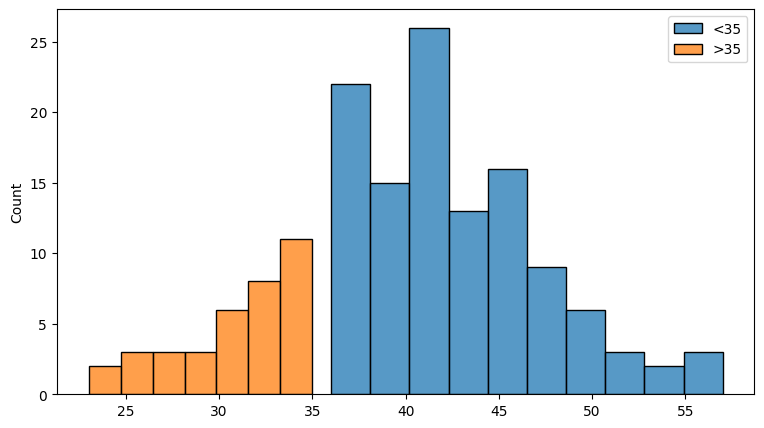

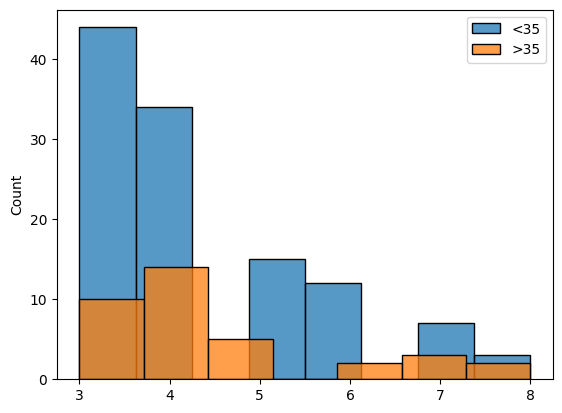

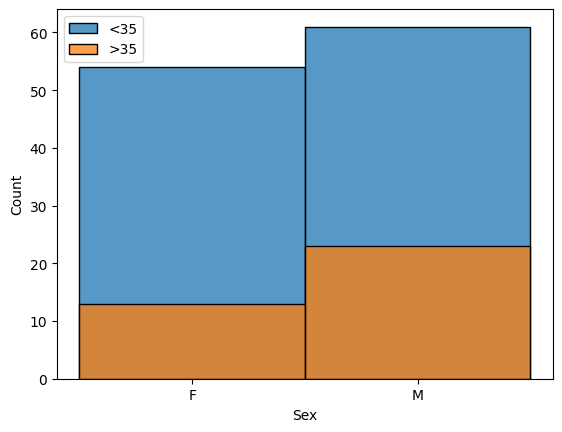

In [95]:
plt.figure(figsize = (9, 5))
sns.histplot(sorted(data_less_35.Age), label = '<35')
sns.histplot(sorted(data_more_35.Age), label = '>35')
plt.legend()
plt.show()
sns.histplot(sorted(data_less_35.days_count), label = '<35')
sns.histplot(sorted(data_more_35.days_count), label = '>35')
plt.legend()
plt.show()
sns.histplot(data_less_35.Sex, label = '<35')
sns.histplot(data_more_35.Sex, label = '>35')
plt.legend()
plt.show()

In [96]:
stats.ttest_ind(data_less_35.Age, data_more_35.Age)

Ttest_indResult(statistic=13.650114600105479, pvalue=4.955060008371439e-28)

При сравнении двух групп (мужчин и женщин) по количеству больничных дней обнаружены статистически значимые отличия (p_value < 0.05)

То есть, H0 - между группами нет статистически значимых отличий

H1 - между группами есть статистически значимые отличия 

Поскольку у нас p_value < 0.05 (= 1.15e-41), то мы отклоняем нулевую гипотезу